In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format='retina'

## Read data

In [3]:
df = pd.read_csv('dataset/Bank_Personal_Loan_Modelling.csv')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Check for missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

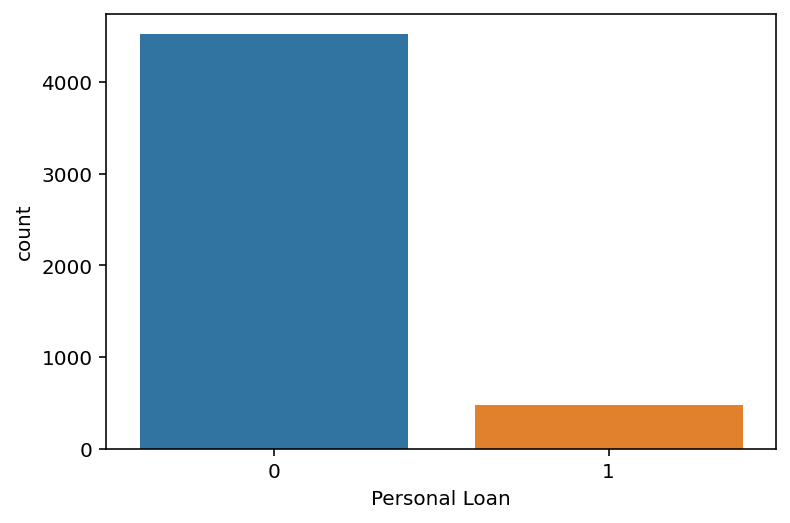

In [6]:
sns.countplot(df['Personal Loan'])

In [7]:
sum(df['Personal Loan'])

480

In [8]:
sum(df['Personal Loan'])*100/len(df)

9.6

**Answer:**

**Personal Loan** column is the target variable in this problem. 480 of the 5k customers have opted for loan. That is the conversion rate is coming around 9.6% of the total.

In [9]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


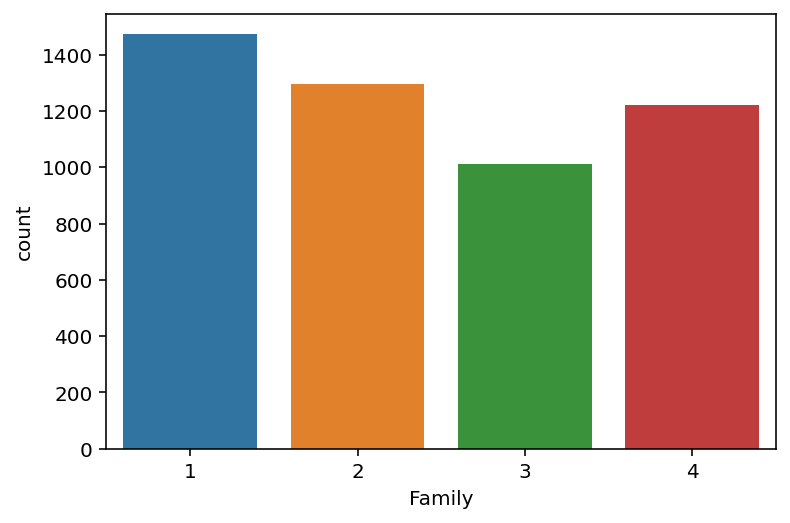

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


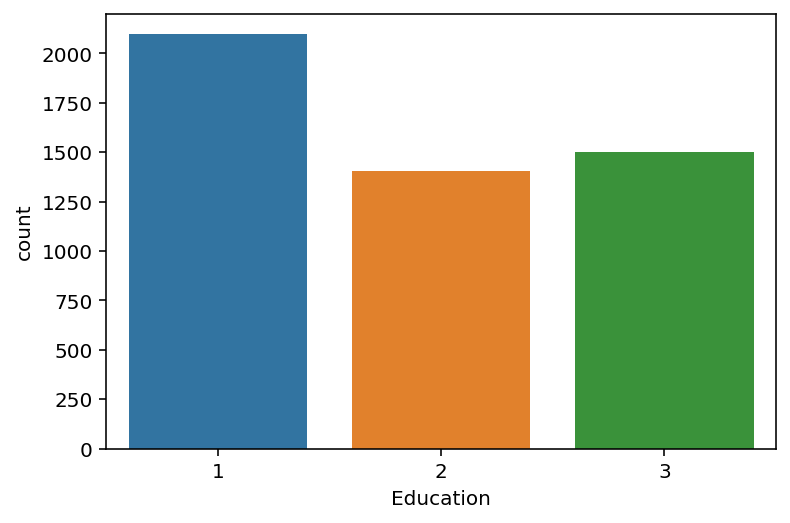

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


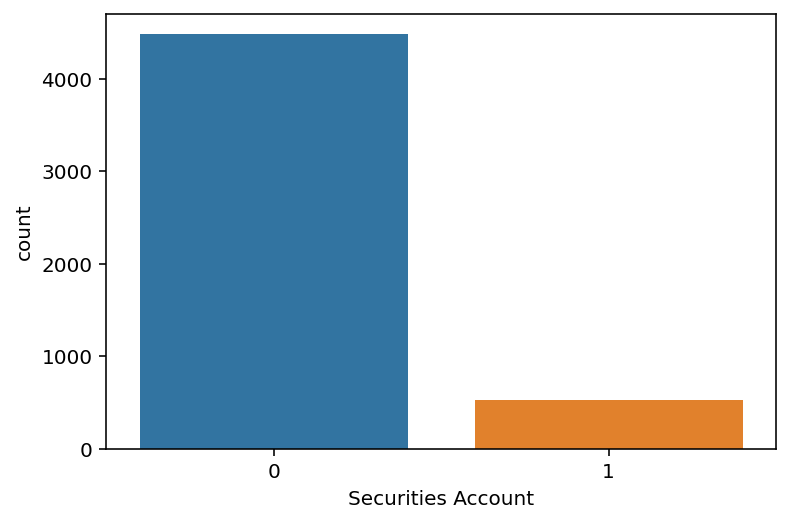

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


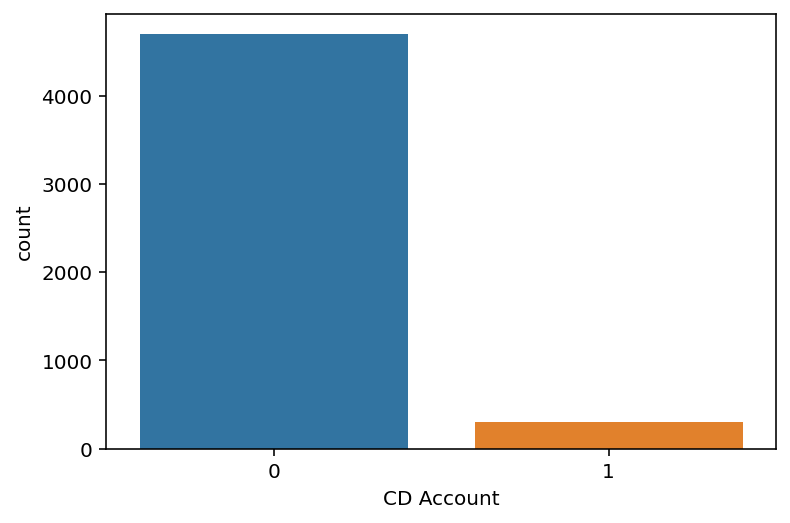

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


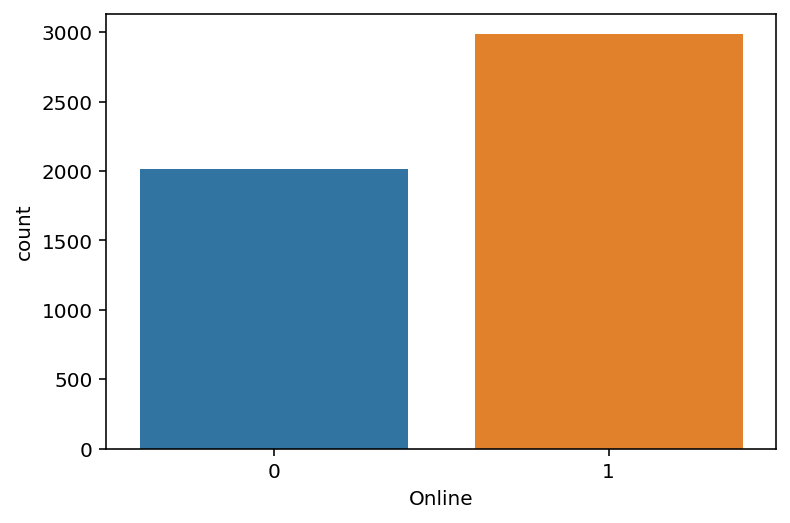

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


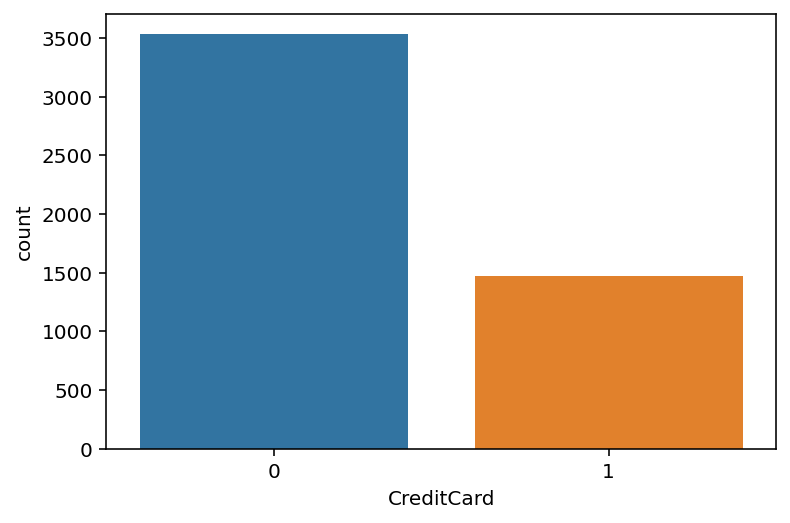

In [10]:
for i in ['Family', 'Education','Securities Account',\
       'CD Account', 'Online', 'CreditCard']:
    sns.countplot(df[i])
    plt.show()

**Answer**

'Family', 'Education','Securities Account', 'CD Account', 'Online', 'CreditCard'
These columns are categorical variables in this problem.

Size of the family varies from one to four. The classes are balenced.

Education have three classes. The class types are given in the data description.

Securities Account and CD Account are the two types of accounts available. A minority of the customers have this type of accounts.

Majority of the cutomers have internet banking facility

Around 1500 of the customers hold credit card

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


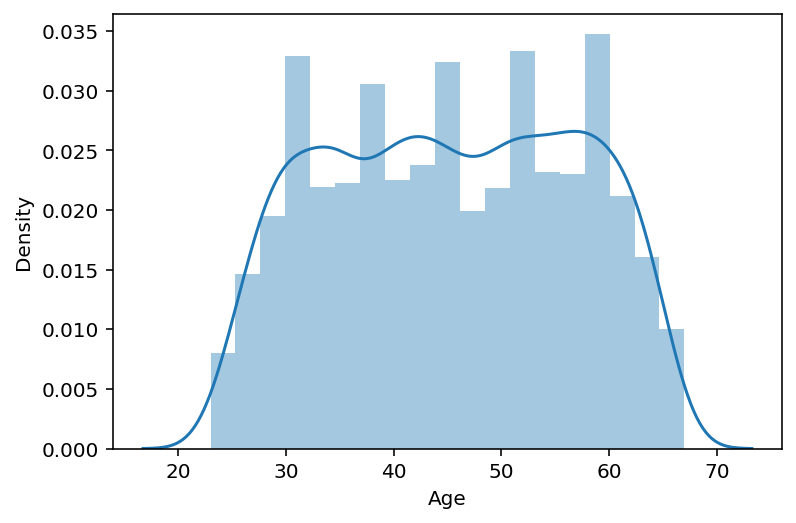

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


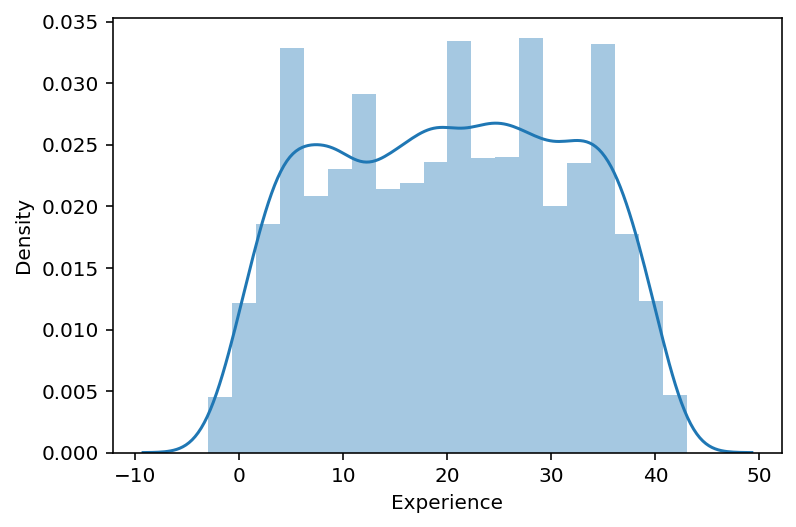

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


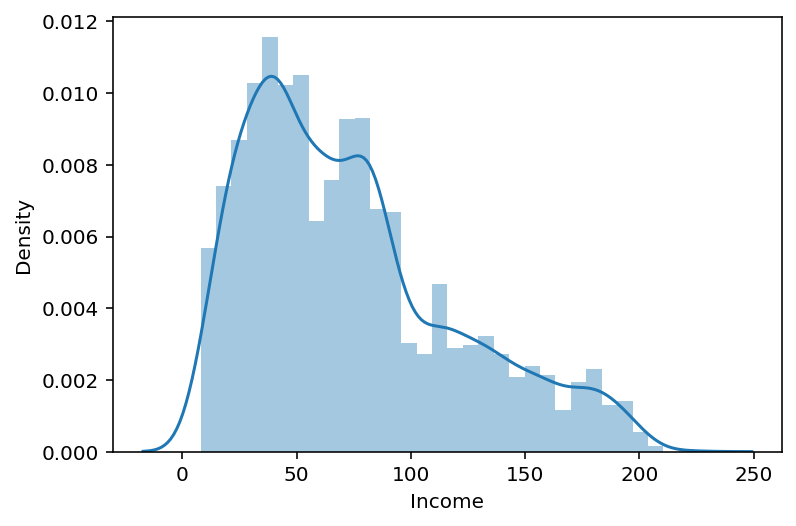

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


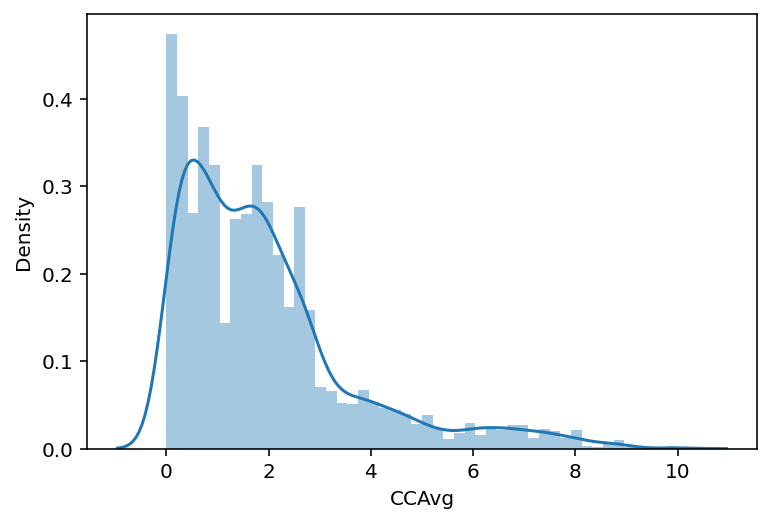

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


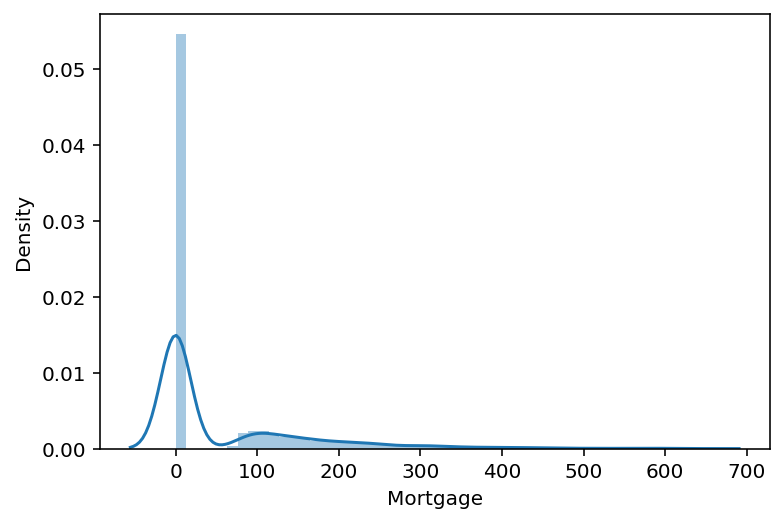

In [11]:
for i in ['Age', 'Experience', 'Income',  'CCAvg', 'Mortgage']:
    sns.distplot(df[i]) 
    plt.show()

In [12]:
neg_exp = [i for i in df['Experience']  if i<0 ]
print(neg_exp)
len(neg_exp)

[-1, -1, -2, -2, -1, -1, -1, -1, -1, -2, -1, -1, -1, -2, -2, -1, -1, -1, -1, -1, -1, -1, -2, -1, -3, -2, -1, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -3, -2, -1, -2, -1, -1, -1, -2, -3, -2, -2, -3, -1, -1]


52

In [13]:
for i, e in enumerate(df['Experience']):
    if e<0 :
        df['Experience'][i]=0 #negative experience to zero

/var/folders/yf/tn88zczj6719nsbh9hywpw440000gn/T/ipykernel_21183/1424890856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Experience'][i]=0 #negative experience to zero


**Answer:**

Age of the customers ranges from around 25 to 65. Experience ranges from zero to 40.

It is interesting to see some negative values in the experience. There is no comments given in the data description on this. 52 data points have negative values. These data were grounded to zero. Later it was observed that there is no change in the logistic regression model with this.



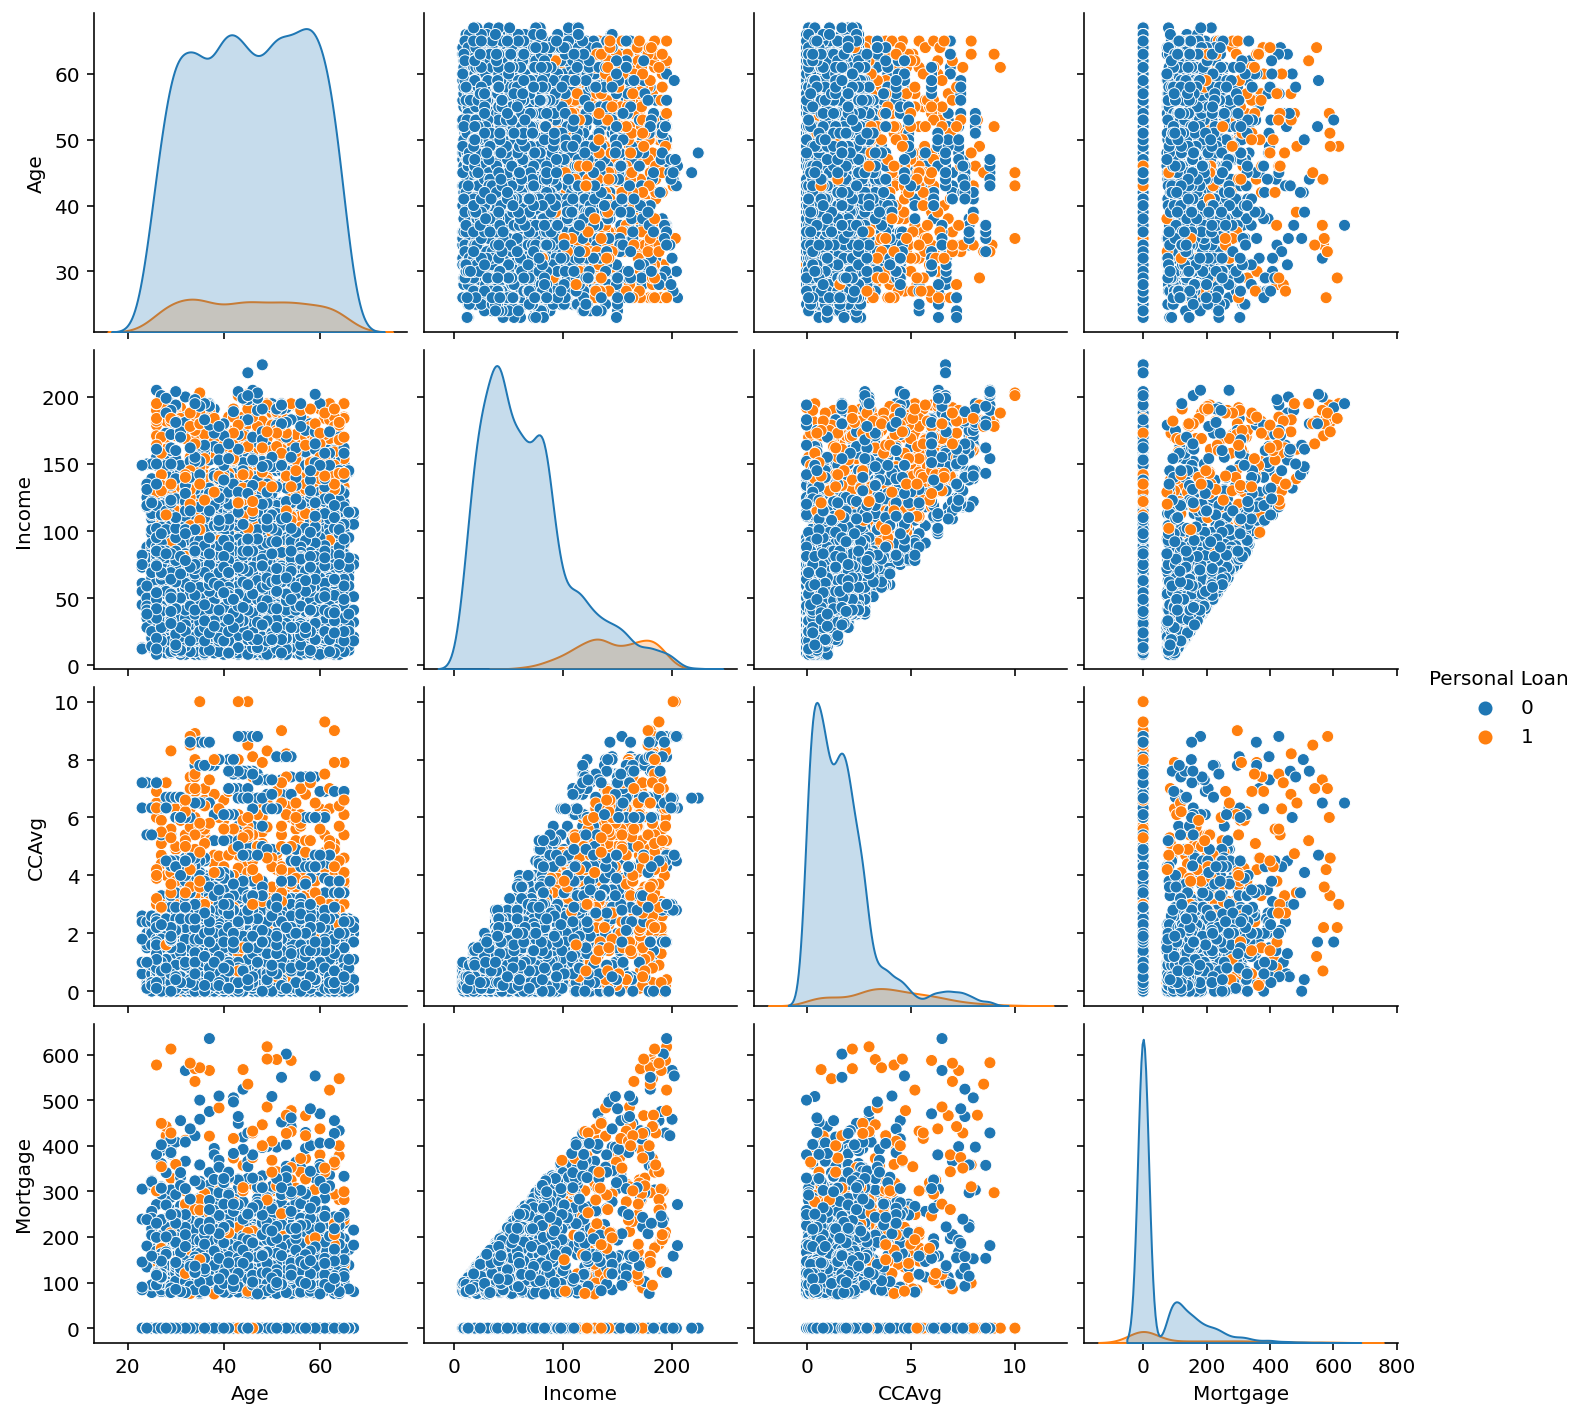

In [14]:
sns.pairplot(df[ ['Age',  'Income', 'CCAvg',\
            'Mortgage', 'Personal Loan']], hue='Personal Loan',
            vars=['Age',  'Income', 'CCAvg','Mortgage'])

The dependancy between continuous variables are not evident. So we can keep all the variables.

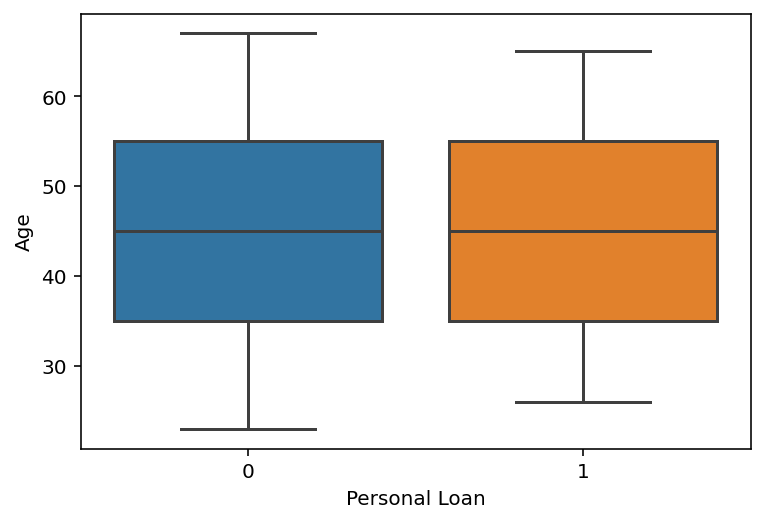

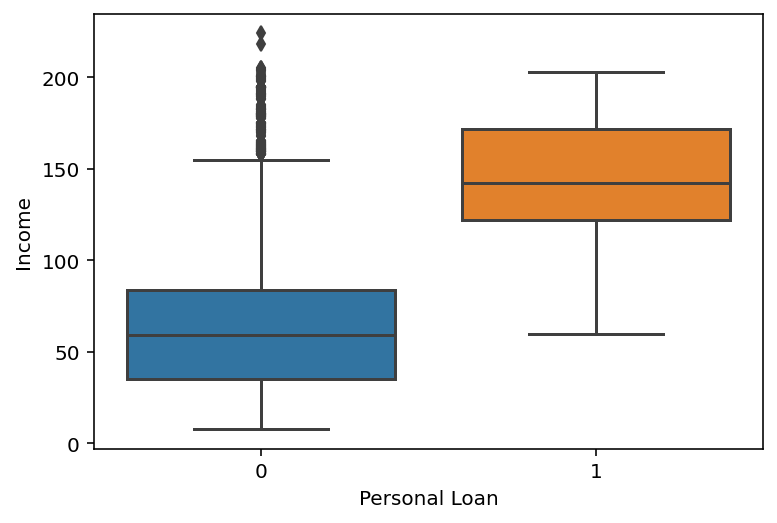

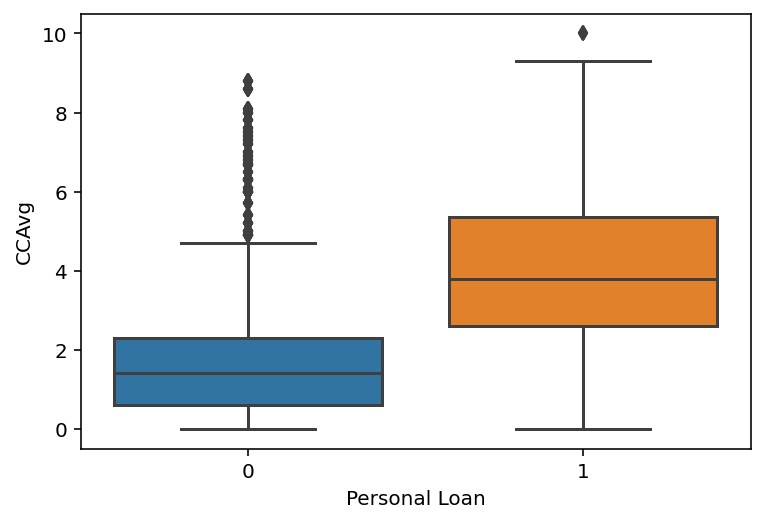

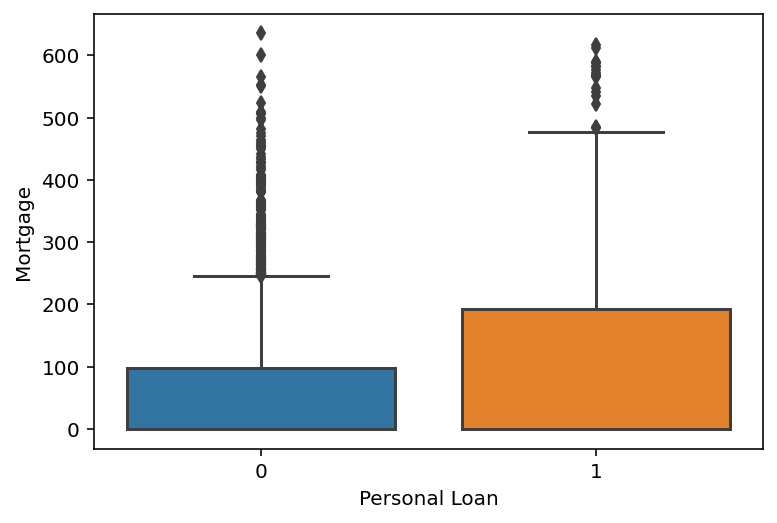

In [15]:
for i in ['Age',  'Income', 'CCAvg','Mortgage']:
    sns.boxplot(x='Personal Loan', y =df[i], data=df, orient='v')
    plt.show()

**Answer:**

There is high dependency with the income and credit card average with the target variable.

In [16]:
df['Mortgage']

0        0
1        0
2        0
3        0
4        0
        ..
4995     0
4996    85
4997     0
4998     0
4999     0
Name: Mortgage, Length: 5000, dtype: int64

In [17]:
X = pd.get_dummies(df, columns = ['Family', 'Education'])
X.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,1,25,1,49,91107,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,2,45,19,34,90089,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,4,35,9,100,94112,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5,35,8,45,91330,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [18]:
X.drop(['ID', 'ZIP Code', 'Personal Loan','Family_4','Education_3'], inplace=True, axis=1)
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Education_1,Education_2
0,25,1,49,1.6,0,1,0,0,0,0,0,0,1,0
1,45,19,34,1.5,0,1,0,0,0,0,0,1,1,0
2,39,15,11,1.0,0,0,0,0,0,1,0,0,1,0
3,35,9,100,2.7,0,0,0,0,0,1,0,0,0,1
4,35,8,45,1.0,0,0,0,0,1,0,0,0,0,1


In [19]:
y = df['Personal Loan']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 0)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

## Logistic Regression

In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

/Users/jidhu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9591428571428572

In [23]:
lr.score(x_test, y_test)

0.9573333333333334

In [24]:
confusion_matrix(y_train, lr.predict(x_train))

array([[3111,   37],
       [ 106,  246]])

In [25]:
confusion_matrix(y_test, lr.predict(x_test))

array([[1357,   15],
       [  49,   79]])

In [26]:
print(classification_report(y_train, lr.predict(x_train)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3148
           1       0.87      0.70      0.77       352

    accuracy                           0.96      3500
   macro avg       0.92      0.84      0.88      3500
weighted avg       0.96      0.96      0.96      3500



In [27]:
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1372
           1       0.84      0.62      0.71       128

    accuracy                           0.96      1500
   macro avg       0.90      0.80      0.84      1500
weighted avg       0.95      0.96      0.95      1500



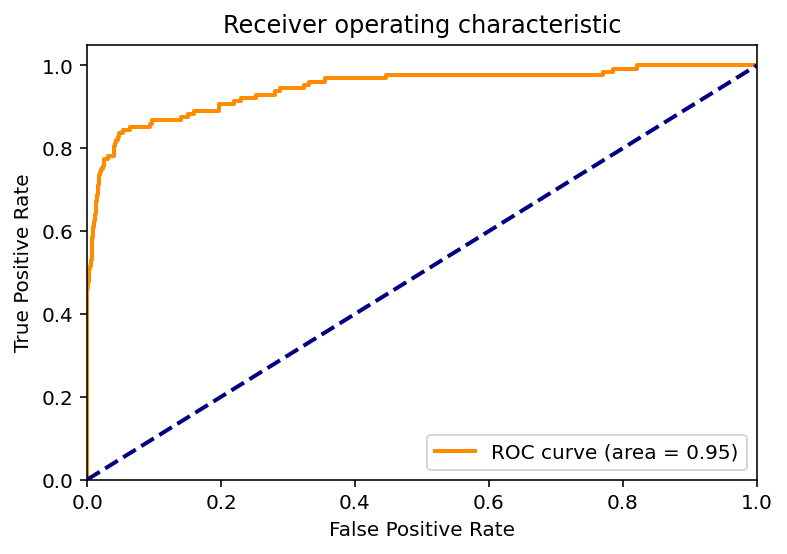

In [28]:
y_score = lr.decision_function(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## KNN

In [29]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_train, y_train)

0.9294285714285714

In [30]:
knn.score(x_test, y_test)

0.91

In [31]:
confusion_matrix(y_train, knn.predict(x_train))

array([[3069,   79],
       [ 168,  184]])

In [32]:
confusion_matrix(y_test, knn.predict(x_test))

array([[1322,   50],
       [  85,   43]])

In [33]:
print(classification_report(y_train, knn.predict(x_train)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3148
           1       0.70      0.52      0.60       352

    accuracy                           0.93      3500
   macro avg       0.82      0.75      0.78      3500
weighted avg       0.92      0.93      0.92      3500



In [34]:
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1372
           1       0.46      0.34      0.39       128

    accuracy                           0.91      1500
   macro avg       0.70      0.65      0.67      1500
weighted avg       0.90      0.91      0.90      1500



## Naive Bayes

In [35]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_train, y_train)

0.8962857142857142

In [36]:
nb.score(x_test, y_test)

0.898

In [37]:
confusion_matrix(y_train, nb.predict(x_train))

array([[2926,  222],
       [ 141,  211]])

In [38]:
confusion_matrix(y_test, nb.predict(x_test))

array([[1272,  100],
       [  53,   75]])

In [39]:
print(classification_report(y_train, nb.predict(x_train)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3148
           1       0.49      0.60      0.54       352

    accuracy                           0.90      3500
   macro avg       0.72      0.76      0.74      3500
weighted avg       0.91      0.90      0.90      3500



In [40]:
print(classification_report(y_test, nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1372
           1       0.43      0.59      0.50       128

    accuracy                           0.90      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.91      0.90      0.91      1500



**Answer:**

Logistic regression performs better on this dataset. It is quite evident from the model evaluation performed. 96% accuracy in train and test. Good precesion recall values. Area under the ROC curve (AUC) is 0.95. This implies the logistic regression is the better model.

Resoning - There is less noise in this dataset and it is proven that the logistic regression performs better in such cases. Another reason is that this is a small clean dataset which makes it solvable by logistic regression.